In [20]:
import pandas as pd
import matplotlib as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler

In [21]:
data = pd.read_csv('XL axiata.csv')
data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,3.550,3.550,3.530,3.540,3.402463,1600
1,2021-06-15,3.353,3.353,3.350,3.350,3.219845,2600
2,2021-06-16,3.660,3.720,3.570,3.720,3.575470,12200
3,2021-06-17,3.608,3.608,3.608,3.608,3.467821,400
4,2021-06-18,3.598,3.598,3.598,3.598,3.458210,2400


<Axes: xlabel='Date'>

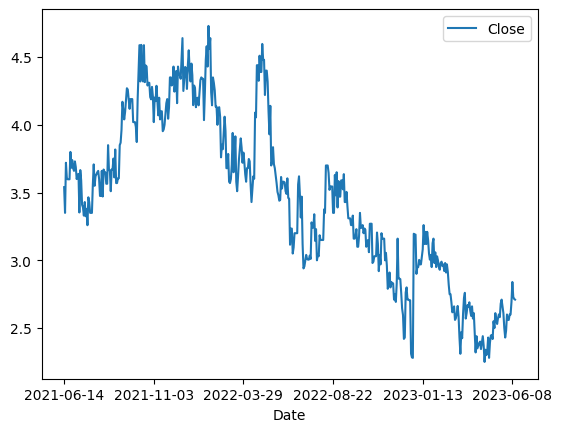

In [22]:
data.plot(x="Date", y="Close")

In [23]:
# memebersihkan data yang 0
def clean(data):
  vol = data["Close"].values
  clean = []
  for i in range (len(vol)):
    if vol[i]==0:
      data = data.drop([i])
      
  return data


from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

  # split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

## Menggunakan 6 input

In [24]:
inp_param = 6
data_clean = clean(data)
volume = data_clean['Close'].values
X, y = split_sequence(volume, inp_param)

# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['input-'+str(i+1) for i in range(inp_param-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['output'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

df.head()

,input-6,input-5,input-4,input-3,input-2,input-1,output
0,3.540,3.350,3.720,3.608,3.598,3.598,3.598
1,3.350,3.720,3.608,3.598,3.598,3.598,3.800
2,3.720,3.608,3.598,3.598,3.598,3.800,3.683
3,3.608,3.598,3.598,3.598,3.800,3.683,3.740
4,3.598,3.598,3.598,3.800,3.683,3.740,3.680


In [25]:
# Split data
training = pd.DataFrame(df.iloc[:359, :].values)

test = pd.DataFrame(df.iloc[359:, :].values)

In [26]:
import numpy
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

training_x = training.iloc[:, 0:6]
training_y = training.iloc[:, 6:]

x_test = test.iloc[:, :6]
y_test = test.iloc[:, 6:]
y_test.set_axis(["y_test"], axis="columns")

X_norm = scaler.fit(training_x)  
X_norm = scaler.transform(training_x)  
# apply same transformation to test data
x_test = scaler.transform(x_test)

training_y = numpy.ravel(training_y, order='C')

# scaler= MinMaxScaler()
# training_x = training.iloc[:, 0:6]
# training_y = training.iloc[:, 6:]

# X_norm= scaler.fit_transform(training_x)
# X_norm
# # y_norm= scaler.fit_transform(df_y)

## Decision tree

In [27]:
from sklearn import tree

#klasifikasi menggunakan decision tree

model_tree = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
model_tree.fit(X_norm, training_y)
y_pred1=model_tree.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1))

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test, y_pred1)
mape1

NameError: name 'y_pred1' is not defined

## KNN

In [28]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=30)
model_knn.fit(X_norm, training_y)
y_pred2=model_knn.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred2))

ValueError: continuous is not supported

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred2)
mape

0.15004351339922053

In [30]:
df_y_pred = pd.DataFrame(y_pred2,columns=['y_pred'])

df_hasil = pd.concat([y_test, df_y_pred], axis=1)
df_hasil

,6,y_pred
0,2.840,3.072800
1,2.830,3.063800
2,2.830,3.076000
3,2.710,3.070167
4,2.750,3.063800
...,...,...
134,2.691,3.070167
135,2.840,3.070167
136,2.730,3.082833
137,2.715,3.081167


## Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

model_n = GaussianNB()
model_n.fit(X_norm, training_y)
y_pred3=model_n.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred3))

ValueError: Unknown label type: (array([2.79 , 2.8  , 2.82 , 2.91 , 2.92 , 2.94 , 2.955, 2.96 , 2.97 ,
       2.98 , 2.99 , 3.   , 3.005, 3.01 , 3.03 , 3.035, 3.04 , 3.05 ,
       3.055, 3.06 , 3.095, 3.1  , 3.115, 3.12 , 3.135, 3.143, 3.15 ,
       3.16 , 3.18 , 3.185, 3.2  , 3.205, 3.226, 3.23 , 3.234, 3.235,
       3.24 , 3.242, 3.259, 3.26 , 3.27 , 3.28 , 3.31 , 3.316, 3.325,
       3.33 , 3.34 , 3.35 , 3.353, 3.376, 3.38 , 3.39 , 3.4  , 3.41 ,
       3.43 , 3.44 , 3.445, 3.455, 3.46 , 3.465, 3.47 , 3.471, 3.475,
       3.48 , 3.484, 3.49 , 3.505, 3.51 , 3.52 , 3.524, 3.525, 3.53 ,
       3.545, 3.55 , 3.558, 3.56 , 3.565, 3.57 , 3.575, 3.58 , 3.585,
       3.59 , 3.598, 3.6  , 3.602, 3.605, 3.612, 3.615, 3.62 , 3.628,
       3.63 , 3.635, 3.636, 3.638, 3.645, 3.649, 3.65 , 3.66 , 3.665,
       3.666, 3.67 , 3.68 , 3.683, 3.688, 3.7  , 3.705, 3.708, 3.71 ,
       3.72 , 3.725, 3.73 , 3.74 , 3.745, 3.748, 3.751, 3.76 , 3.785,
       3.795, 3.8  , 3.818, 3.82 , 3.83 , 3.835, 3.85 , 3.853, 3.868,
       3.873, 3.9  , 3.915, 3.93 , 3.94 , 3.953, 3.955, 3.963, 3.965,
       3.985, 4.   , 4.02 , 4.035, 4.04 , 4.045, 4.055, 4.06 , 4.07 ,
       4.085, 4.09 , 4.095, 4.1  , 4.11 , 4.118, 4.125, 4.13 , 4.134,
       4.14 , 4.144, 4.145, 4.16 , 4.17 , 4.175, 4.185, 4.188, 4.19 ,
       4.191, 4.195, 4.2  , 4.201, 4.205, 4.21 , 4.22 , 4.24 , 4.245,
       4.25 , 4.255, 4.26 , 4.265, 4.27 , 4.28 , 4.288, 4.29 , 4.3  ,
       4.305, 4.31 , 4.315, 4.32 , 4.325, 4.33 , 4.34 , 4.35 , 4.366,
       4.367, 4.375, 4.38 , 4.39 , 4.397, 4.4  , 4.405, 4.417, 4.427,
       4.43 , 4.438, 4.44 , 4.452, 4.48 , 4.49 , 4.51 , 4.55 , 4.56 ,
       4.58 , 4.588, 4.59 , 4.597, 4.64 , 4.73 ]),)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred3)
mape

NameError: name 'y_pred3' is not defined

## MLP

In [33]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

clf.fit(X_norm, training_y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=3,
              solver='lbfgs')
y_pred4 = clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred4))

ValueError: Unknown label type: (array([3.598, 3.8  , 3.683, 3.74 , 3.68 , 3.66 , 3.73 , 3.688, 3.6  ,
       3.628, 3.638, 3.353, 3.666, 3.59 , 3.41 , 3.39 , 3.33 , 3.43 ,
       3.325, 3.38 , 3.259, 3.465, 3.43 , 3.35 , 3.35 , 3.35 , 3.558,
       3.708, 3.55 , 3.62 , 3.635, 3.65 , 3.66 , 3.6  , 3.475, 3.475,
       3.66 , 3.471, 3.67 , 3.649, 3.649, 3.565, 3.565, 3.85 , 3.665,
       3.665, 3.51 , 3.67 , 3.67 , 3.751, 3.612, 3.818, 3.57 , 3.57 ,
       3.605, 3.605, 3.85 , 3.868, 3.963, 4.17 , 4.11 , 4.04 , 4.095,
       4.185, 4.27 , 4.26 , 4.191, 4.118, 4.19 , 4.19 , 4.19 , 4.02 ,
       4.02 , 4.02 , 3.985, 3.873, 4.19 , 4.4  , 4.588, 4.32 , 4.59 ,
       4.375, 4.32 , 4.588, 4.315, 4.438, 4.43 , 4.29 , 4.31 , 4.31 ,
       4.205, 4.188, 4.28 , 4.21 , 4.02 , 4.201, 4.175, 4.288, 4.185,
       4.07 , 4.2  , 4.04 , 4.1  , 4.1  , 3.953, 3.965, 4.   , 4.085,
       4.16 , 4.19 , 4.045, 4.13 , 4.35 , 4.35 , 4.29 , 4.305, 4.43 ,
       4.245, 4.3  , 4.397, 4.16 , 4.43 , 4.38 , 4.366, 4.34 , 4.49 ,
       4.64 , 4.25 , 4.34 , 4.427, 4.417, 4.265, 4.44 , 4.55 , 4.405,
       4.32 , 4.452, 4.367, 4.145, 4.29 , 4.27 , 4.13 , 4.195, 4.2  ,
       4.144, 4.24 , 4.33 , 4.35 , 4.34 , 4.34 , 4.035, 4.24 , 4.48 ,
       4.58 , 4.43 , 4.73 , 4.56 , 4.64 , 4.24 , 4.144, 4.35 , 4.31 ,
       4.255, 4.134, 4.134, 4.   , 4.125, 4.13 , 4.06 , 3.76 , 3.853,
       3.82 , 3.94 , 4.06 , 3.955, 3.68 , 3.68 , 3.785, 3.58 , 3.57 ,
       3.6  , 3.705, 3.94 , 3.65 , 3.76 , 3.915, 3.58 , 3.51 , 3.62 ,
       3.745, 3.82 , 3.9  , 3.83 , 3.72 , 3.795, 3.725, 3.635, 3.58 ,
       3.68 , 3.68 , 3.748, 3.73 , 3.56 , 3.43 , 3.525, 3.62 , 3.602,
       4.09 , 4.055, 4.44 , 4.44 , 4.325, 4.51 , 4.39 , 4.39 , 4.597,
       4.48 , 4.48 , 4.22 , 4.4  , 4.4  , 4.32 , 4.1  , 3.93 , 4.14 ,
       3.7  , 3.73 , 3.835, 3.71 , 3.68 , 3.628, 3.57 , 3.505, 3.48 ,
       3.44 , 3.445, 3.615, 3.53 , 3.58 , 3.58 , 3.575, 3.51 , 3.49 ,
       3.605, 3.46 , 3.455, 3.115, 3.234, 3.234, 3.05 , 3.095, 3.2  ,
       3.2  , 3.2  , 3.2  , 3.56 , 3.62 , 3.484, 3.316, 3.47 , 3.12 ,
       2.94 , 2.955, 3.   , 3.04 , 3.01 , 3.005, 3.005, 3.035, 3.01 ,
       3.28 , 3.242, 3.242, 3.34 , 3.143, 3.23 , 3.   , 3.04 , 3.03 ,
       3.185, 3.15 , 3.15 , 3.15 , 3.15 , 3.376, 3.35 , 3.7  , 3.7  ,
       3.7  , 3.645, 3.52 , 3.545, 3.545, 3.545, 3.35 , 3.35 , 3.63 ,
       3.48 , 3.65 , 3.39 , 3.585, 3.47 , 3.47 , 3.59 , 3.59 , 3.524,
       3.636, 3.43 , 3.43 , 3.505, 3.4  , 3.31 , 3.31 , 3.31 , 3.26 ,
       3.26 , 3.33 , 3.16 , 3.16 , 3.18 , 3.23 , 3.1  , 3.1  , 3.18 ,
       3.35 , 3.24 , 3.24 , 3.26 , 3.2  , 3.235, 3.226, 3.1  , 3.135,
       3.15 , 3.06 , 3.27 , 3.27 , 3.27 , 2.98 , 2.99 , 3.03 , 3.03 ,
       3.03 , 3.205, 3.12 , 2.92 , 3.04 , 2.97 , 3.2  , 3.16 , 3.16 ,
       3.16 , 3.   , 3.055, 2.96 , 2.79 , 2.82 , 2.91 , 2.8  ]),)

In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred4)
mape

NameError: name 'y_pred4' is not defined

## Random Forest

In [ ]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_norm, training_y)
 
# performing predictions on the test dataset
y_pred5 = clf.predict(x_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred5))

ValueError: Unknown label type: 'continuous'